In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x=np.linspace(0,10,1000)

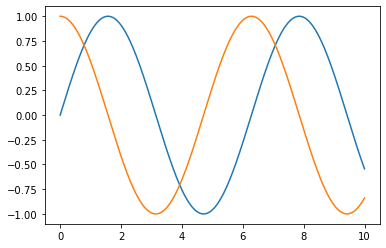

In [3]:
plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x))

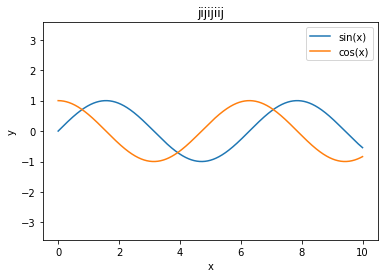

In [4]:
plt.plot(x,np.sin(x),label='sin(x)')
plt.plot(x,np.cos(x),label='cos(x)')
plt.axis([0,100,0,100])
plt.axis('equal')
plt.title('jijijiij')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

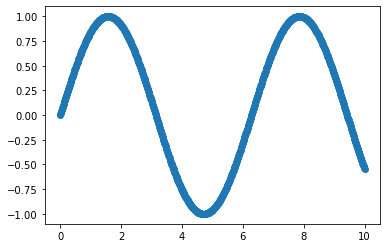

In [5]:
y=np.sin(x)
plt.scatter(x,y,marker='o')

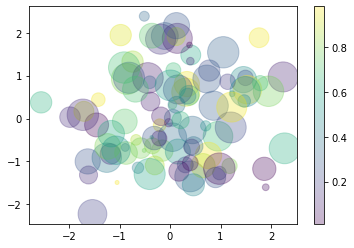

In [6]:
rng=np.random.RandomState(0)
x=rng.randn(100)
y=rng.randn(100)
colors=rng.rand(100)
sizes=1000*rng.rand(100)

plt.scatter(x,y,c=colors,s=sizes,alpha=0.3,cmap='viridis')
plt.colorbar();

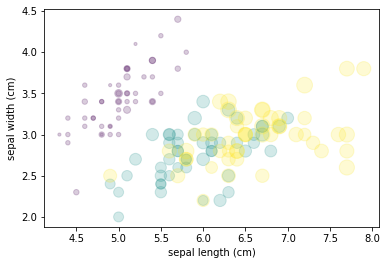

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,s=100*features[3],c=iris.target,cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid')
import numpy as np

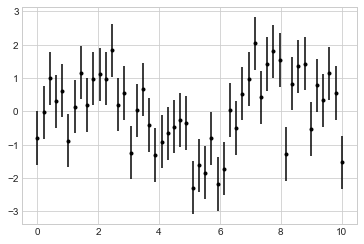

In [9]:
x=np.linspace(0,10,50)
dy=0.8
y=np.sin(x)+dy*np.random.randn(50)

plt.errorbar(x,y,yerr=dy,fmt='.k');

<ErrorbarContainer object of 3 artists>

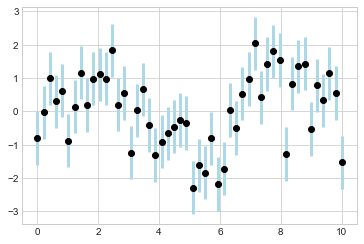

In [10]:
plt.errorbar(x,y,yerr=dy,fmt='o',color='black',ecolor='lightblue',elinewidth=3,capsize=0)

## 密度图与等高线图

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

In [12]:
def f(x,y):
    return np.sin(x)**10+np.cos(10+y*x)*np.cos(x)

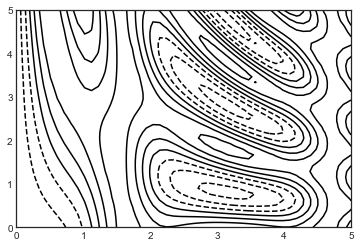

In [13]:
x=np.linspace(0,5,50)
y=np.linspace(0,5,40)
X,Y=np.meshgrid(x,y)
z=f(X,Y)

plt.contour(X,Y,z,colors='black');

In [14]:
z.shape

(40, 50)

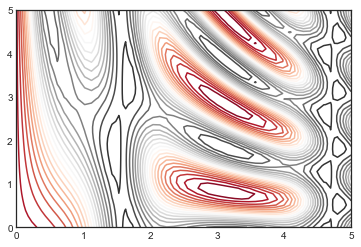

In [15]:
plt.contour(X,Y,z,20,cmap='RdGy');

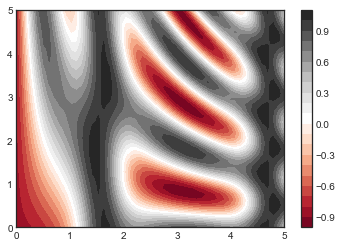

In [16]:
plt.contourf(X,Y,z,20,cmap='RdGy');
plt.colorbar();

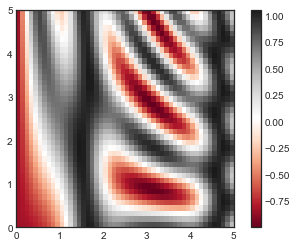

In [17]:
plt.imshow(z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy')
plt.colorbar();

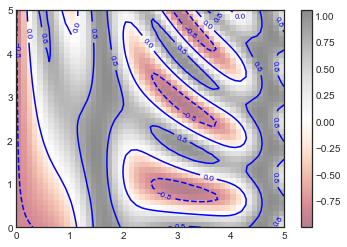

In [18]:
contours=plt.contour(X,Y,z,2,colors='blue')
plt.clabel(contours,inline=True,fontsize=8)
plt.imshow(z,extent=[0,5,0,5],origin='lower',aspect='auto',cmap='RdGy',alpha=0.5)
plt.colorbar();

## 频次直方图，数据区间划分和分布密度

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [20]:
data=np.random.randn(1000)

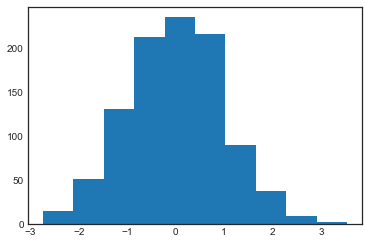

In [21]:
plt.hist(data);

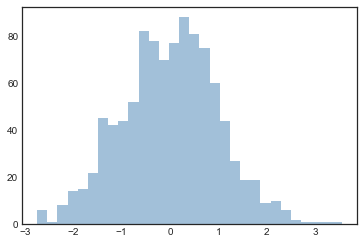

In [22]:
plt.hist(data,bins=30,alpha=0.5,
        histtype='stepfilled',color='steelblue',
        edgecolor='none');

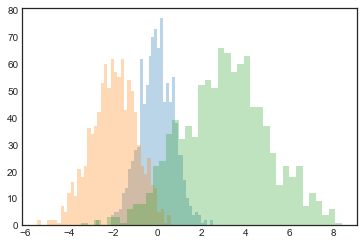

In [23]:
x1=np.random.normal(0,0.8,1000)
x2=np.random.normal(-2,1,1000)
x3=np.random.normal(3,2,1000)

kwargs=dict(histtype='stepfilled',alpha=0.3,bins=40)

plt.hist(x1,**kwargs)
plt.hist(x2,**kwargs)
plt.hist(x3,**kwargs);

In [24]:
#只想统计频次
counts,bin_edges=np.histogram(data,bins=5)
print(counts)

[ 66 343 451 128  12]


In [25]:
#高斯多元分布生成xy轴样本
mean=[0,0]
cov=[[1,1],[1,2]]
x,y=np.random.multivariate_normal(mean,cov,10000).T

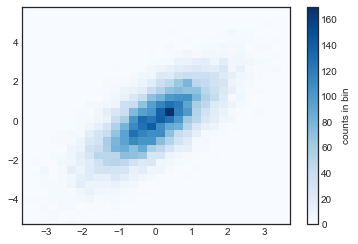

In [26]:
plt.hist2d(x,y,bins=30,cmap='Blues')
cb=plt.colorbar()
cb.set_label('counts in bin')

In [27]:
counts,xedges,yedges=np.histogram2d(x,y,bins=30)
counts.shape

(30, 30)

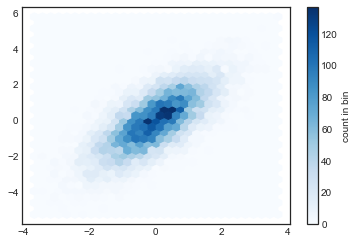

In [28]:
plt.hexbin(x,y,gridsize=30,cmap='Blues')
cb=plt.colorbar(label='count in bin')

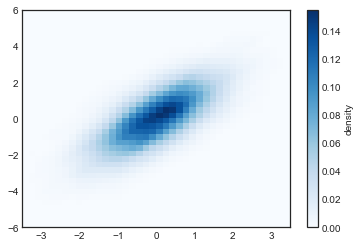

In [42]:
#核密度估计
from scipy.stats import gaussian_kde 

#拟合数组维度
data=np.vstack([x,y])
kde=gaussian_kde(data)

#用一对规则的网格数据进行拟合
xgrid=np.linspace(-3.5,3.5,40)
ygrid=np.linspace(-6,6,40)
Xgrid,Ygrid=np.meshgrid(xgrid,ygrid)
z=kde.evaluate(np.vstack([Xgrid.ravel(),Ygrid.ravel()]))

#画出结果图
plt.imshow(z.reshape(Xgrid.shape),
                    origin='lower',aspect='auto',
                    extent=[-3.5,3.5,-6,6],
                    cmap='Blues')
cb=plt.colorbar()
cb.set_label("density")

## 配置图例

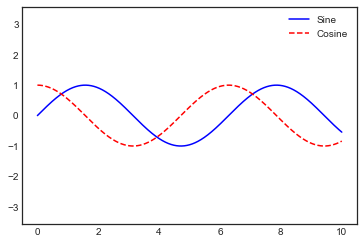

In [43]:
x=np.linspace(0,10,10000)
fig,ax=plt.subplots()
ax.plot(x,np.sin(x),'-b',label='Sine')
ax.plot(x,np.cos(x),'--r',label='Cosine')
ax.axis('equal')
leg=ax.legend();

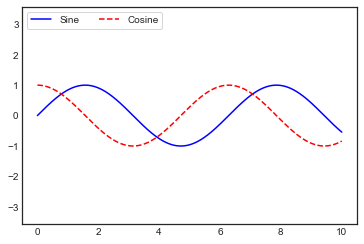

In [51]:
ax.legend(loc='upper left',frameon=True,ncol=2)#ncol设置标签列数
fig